In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import metrics
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import keras
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot
import sys
import os
import subprocess

In [51]:
input = tf.keras.Input(shape=(2*49,))
output = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)
output = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)
output = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)
output = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)
output = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)
output = tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)(output)
model2 = tf.keras.Model(inputs=input, outputs=output)

In [52]:
model2.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['mse',tf.keras.metrics.BinaryAccuracy()])

In [106]:
model2.fit(X, Y, epochs=100, batch_size=1000)

Epoch 1/100
512/512 [==============================] - 2s 3ms/step - loss: 0.1256 - mse: 0.0348 - binary_accuracy: 0.9538
Epoch 2/100
512/512 [==============================] - 1s 3ms/step - loss: 0.1182 - mse: 0.0334 - binary_accuracy: 0.9555
Epoch 3/100
512/512 [==============================] - 1s 3ms/step - loss: 0.1177 - mse: 0.0333 - binary_accuracy: 0.9556
Epoch 4/100
512/512 [==============================] - 1s 3ms/step - loss: 0.1177 - mse: 0.0333 - binary_accuracy: 0.9558
Epoch 5/100
512/512 [==============================] - 1s 3ms/step - loss: 0.1178 - mse: 0.0334 - binary_accuracy: 0.9558
Epoch 6/100
512/512 [==============================] - 1s 3ms/step - loss: 0.1184 - mse: 0.0335 - binary_accuracy: 0.9555
Epoch 7/100
512/512 [==============================] - 1s 3ms/step - loss: 0.1192 - mse: 0.0338 - binary_accuracy: 0.9551
Epoch 8/100
512/512 [==============================] - 1s 3ms/step - loss: 0.1192 - mse: 0.0338 - binary_accuracy: 0.9549
Epoch 9/100
512/512 [===

KeyboardInterrupt: 

In [108]:
model2.evaluate(X,Y)

16000/16000 [==============================] - 11s 668us/step - loss: 0.7084 - mse: 0.1778 - binary_accuracy: 0.7757


[0.7084100246429443, 0.17778119444847107, 0.7756685018539429]

In [61]:
model2.save('models/model2', save_format='tf')

INFO:tensorflow:Assets written to: models/model2/assets


In [107]:
subprocess.run('export DYLD_LIBRARY_PATH=${DYLD_LIBRARY_PATH}:~/libtensorflow2/lib; build/simulate -s TORUS --pmin 0.2  --Np 20 -n 512 --Lmin 7 -v 1 --generate --fname "train_data/data2.csv"', shell=True)
df=pd.read_csv("train_data/data1.csv")
X = df.values[:,0:49*2]
Y = df.values[:,49*2:49*2+2]

In [163]:
loaded_2 = tf.keras.models.load_model("models/model1")

In [28]:
loaded_2.evaluate(X, Y)

NameError: name 'loaded_2' is not defined

In [39]:
predictions = model2.predict(X)
rounded = np.array([[round(x[0]),round(x[1])] for x in predictions])

(array([[1570.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         8669.],
        [1822.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         8417.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

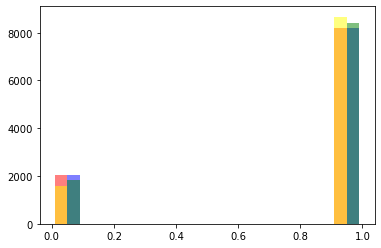

In [40]:
matplotlib.pyplot.hist(Y,alpha = 0.5,color=["red","blue"])
matplotlib.pyplot.hist(rounded,alpha = 0.5,color=["yellow","green"])
# matplotlib.pyplot.hist(predictions,alpha = 0.5)

In [20]:
Y.

AttributeError: 'numpy.ndarray' object has no attribute 'list'

In [8]:
os.system('export DYLD_LIBRARY_PATH=${DYLD_LIBRARY_PATH}:~/libtensorflow2/lib')

0

In [11]:
os.system('build/simulate -s TORUS --pmin 0.02 --pmax 0.02 --Np 20 -n 512 --Lmin 7 -v 1 --test --seed 1')

6